In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
icecream_data=pd.read_csv("Ice Cream Sales - temperatures.csv")
icecream_data.head()

,Temperature,Ice Cream Profits
0,39,13.17
1,40,11.88
2,41,18.82
3,42,18.65
4,43,17.02


In [3]:
def to_celsius(temp):
    celci_temp=(temp-32)/(1.8)
    return celci_temp

In [4]:
icecream_data["Temperature"]=icecream_data["Temperature"].apply(to_celsius)

In [7]:
icecream_data["Temperature"]=icecream_data["Temperature"].astype(int)

In [10]:
icecream_data.head()

,Temperature,Ice Cream Profits
0,3,13.17
1,4,11.88
2,5,18.82
3,5,18.65
4,6,17.02


In [11]:
icecream_data.shape

(365, 2)

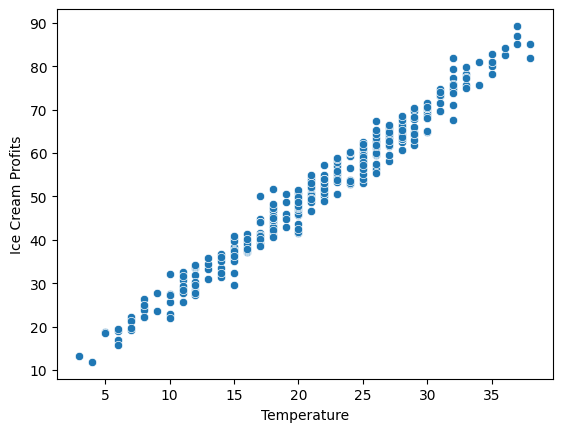

In [12]:
# visualization of relationship
sns.scatterplot(data=icecream_data,x="Temperature",y="Ice Cream Profits")
plt.show()

In [13]:
corr_profit=icecream_data.corr()
corr_profit

,Temperature,Ice Cream Profits
Temperature,1.000000,0.987279
Ice Cream Profits,0.987279,1.000000


# Independent and Dependent features

In [14]:
X=icecream_data[["Temperature"]]
Y=icecream_data["Ice Cream Profits"]

# Train and Test Split

In [17]:
from sklearn.model_selection import train_test_split

In [38]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [39]:
X_train

,Temperature
155,21
261,26
132,20
222,25
140,20
...,...
71,15
106,18
270,27
348,33


In [40]:
y_train

155    52.05
261    61.82
132    45.89
222    60.86
140    43.73
       ...  
71     40.25
106    42.10
270    62.32
348    77.18
102    45.38
Name: Ice Cream Profits, Length: 273, dtype: float64

In [41]:
X_test.shape

(92, 1)

In [42]:
y_test.shape

(92,)

# Standardization of the Data

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
scale=StandardScaler()

In [43]:
X_train=scale.fit_transform(X_train)
X_train.shape

(273, 1)

In [44]:
X_test=scale.transform(X_test)
X_test.shape

(92, 1)

# Apply Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression

In [45]:
regression_model=LinearRegression(n_jobs=-1)

In [46]:
regression_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [47]:
print(f"Slope value: {regression_model.coef_}")
print(f"Intercept value: {regression_model.intercept_}")

Slope value: [15.02049399]
Intercept value: 52.259853479853476


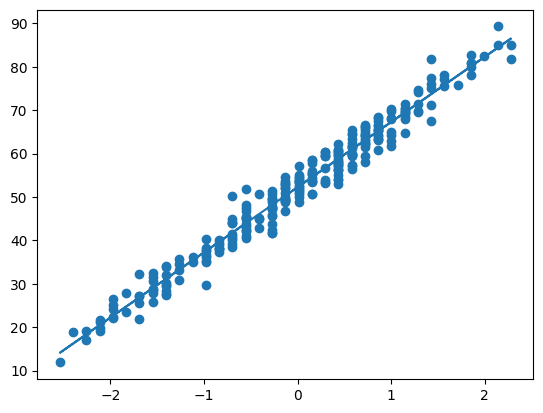

In [48]:
plt.scatter(X_train,y_train)
plt.plot(X_train,regression_model.predict(X_train))
plt.show()

# Prediction of the points

In [49]:
y_pred=regression_model.predict(X_test)
y_pred

array([54.5599584 , 29.01709829, 22.63138326, 67.33138846, 35.40281332,
       52.43138673, 39.65995667, 43.91710002, 50.30281505, 46.0456717 ,
       73.71710349, 31.14566997, 67.33138846, 35.40281332, 48.17424338,
       65.20281678, 11.98852488, 63.07424511, 71.58853181, 43.91710002,
       20.50281159, 50.30281505, 37.531385  , 60.94567343, 60.94567343,
       54.5599584 , 58.81710176, 65.20281678, 77.97424684, 84.35996187,
       26.88852662, 43.91710002, 31.14566997, 80.10281852, 54.5599584 ,
       43.91710002, 37.531385  , 26.88852662, 73.71710349, 71.58853181,
       60.94567343, 75.84567517, 29.01709829, 65.20281678, 43.91710002,
       58.81710176, 41.78852835, 35.40281332, 18.37423991, 31.14566997,
       58.81710176, 75.84567517, 65.20281678, 63.07424511, 52.43138673,
       73.71710349, 41.78852835, 16.24566824, 82.23139019, 39.65995667,
       58.81710176, 75.84567517, 39.65995667, 31.14566997, 63.07424511,
       37.531385  , 58.81710176, 46.0456717 , 56.68853008, 39.65

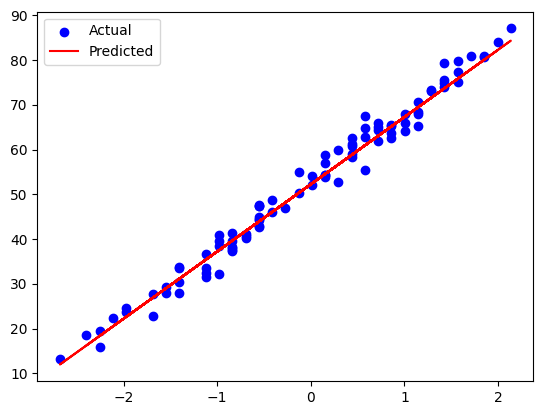

In [50]:
plt.scatter(X_test,y_test,color="blue",label="Actual")
plt.plot(X_test,y_pred,color="red",label="Predicted")
plt.legend()
plt.show()

# Performance Metrics

In [51]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [52]:
mse=mean_squared_error(y_true=y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=y_test,y_pred=y_pred)
rmse=np.sqrt(mse)

In [53]:
print(f"Mean Square Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Square Error: {rmse}")

Mean Square Error: 5.867411577094589
Mean Absolute Error: 1.9653486955469708
Root Mean Square Error: 2.4222740507825677


In [54]:
r2_score=r2_score(y_true=y_test,y_pred=y_pred)
print(f"R squared value: {r2_score}")

R squared value: 0.9817728482014108


# For new input

In [59]:
temp_today=int(input("Whats the temperature today?"))
y_new_predict=regression_model.predict(scale.transform([[temp_today]]))
print(f"According to today's temperatures, Ice cream sales will be around: ${y_new_predict[0]}")

According to today's temperatures, Ice cream sales will be around: $26.8885266154778


e:\ml-bootcamp\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
